In [ ]:
# load datraframe

import pandas as pd

df = pd.read_csv('dataset_pca_3_components_personality.csv', sep=';')
df.head()

,PC1,PC2,PC3,Personality
0,0.425156,0.024034,0.255252,0.0
1,-0.822265,-0.213964,0.008904,1.0
2,-0.545634,-0.053308,0.213832,1.0
3,0.908568,-0.042458,0.072104,0.0
4,0.404915,0.079302,0.065595,0.0


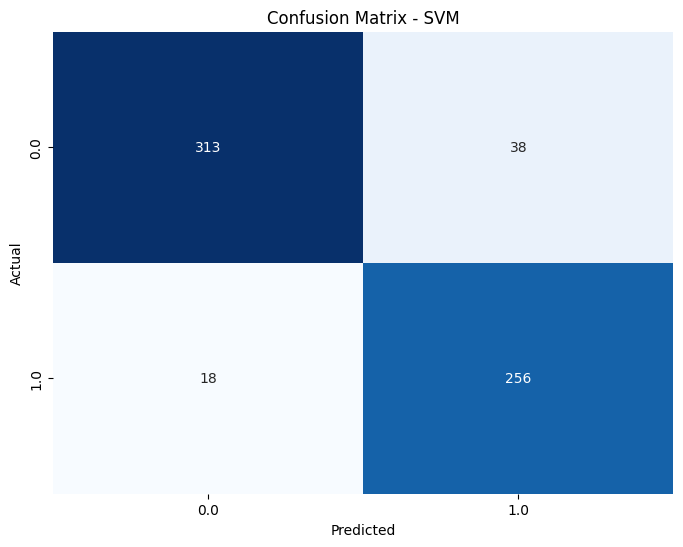

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       351
         1.0       0.87      0.93      0.90       274

    accuracy                           0.91       625
   macro avg       0.91      0.91      0.91       625
weighted avg       0.91      0.91      0.91       625



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features and target variable
X = df.drop("Personality", axis=1)
y = df["Personality"]

# Scale numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier()

# Initialize the feature selector with forward selection
sfs = SequentialFeatureSelector(gb, direction='forward', cv=5)

# Initialize DataFrame to store results
results_df = pd.DataFrame({
    'Num_Features': pd.Series(dtype='int'),
    'Selected_Features': pd.Series(dtype='object'),
    'F1_Score': pd.Series(dtype='float')
})

# Iterate over the number of features to select (up to n-1 to avoid error)
for i in range(1, X_train.shape[1]):
    sfs.n_features_to_select = i
    sfs.fit(X_train, y_train)

    selected_features_mask = sfs.get_support()
    selected_features = X_train.columns[selected_features_mask]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    gb.fit(X_train_selected, y_train)
    y_pred = gb.predict(X_test_selected)

    f1 = f1_score(y_test, y_pred, average='macro')

    results_df = pd.concat(
        [results_df, pd.DataFrame([{
            'Num_Features': i,
            'Selected_Features': list(selected_features),
            'F1_Score': f1
        }])],
        ignore_index=True
    )

# Display results
results_df


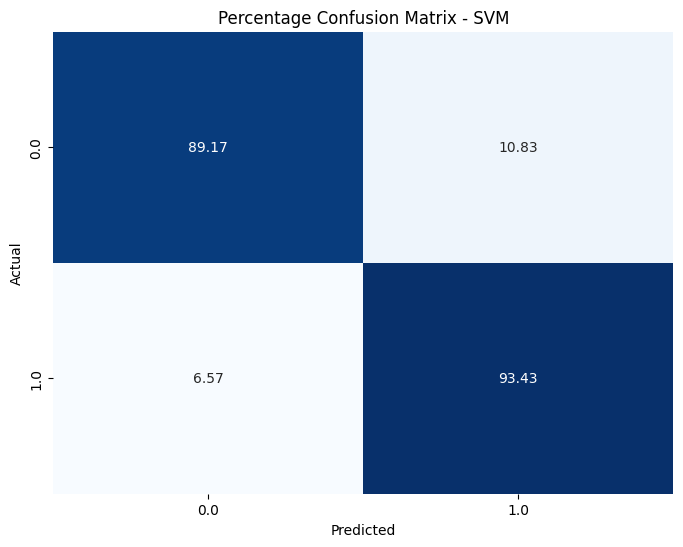

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate confusion matriz
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# display confusion matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Percentage Confusion Matrix - SVM')
plt.show()


In [ ]:
# Create loops to test different kernel types, for each iteration compute the macro average F1 score

kernels = ['linear', 'poly', 'rbf']
macro_avg_f1_scores = {}

for kernel_type in kernels:
    print(f"Training SVM with kernel: {kernel_type}")
    svm = SVC(kernel=kernel_type, C=1, gamma='scale')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Evaluation metrics report
    report = classification_report(y_test, y_pred, output_dict=True)
    macro_avg_f1 = report['macro avg']['f1-score']
    macro_avg_f1_scores[kernel_type] = macro_avg_f1
    print(f"Macro Avg F1-score for {kernel_type} kernel: {macro_avg_f1}\n")

print("Macro Avg F1-scores for different kernels:")
for kernel, f1 in macro_avg_f1_scores.items():
    print(f"{kernel}: {f1}")


Training SVM with kernel: linear
Macro Avg F1-score for linear kernel: 0.9096485068770394

Training SVM with kernel: poly
Macro Avg F1-score for poly kernel: 0.8981318348687938

Training SVM with kernel: rbf
Macro Avg F1-score for rbf kernel: 0.9096485068770394

Macro Avg F1-scores for different kernels:
linear: 0.9096485068770394
poly: 0.8981318348687938
rbf: 0.9096485068770394
